Optical Character Recognition (Tesseract OCR)

Principle: OCR software identifies patterns in the binary image that match known text shapes.

Tesseract OCR works by breaking down the image into shapes (like lines and curves) and comparing these shapes to a character set to recognize text. Tesseract uses a machine learning approach with trained models to match shapes to text characters, particularly useful when the text is clear and contrast is high.

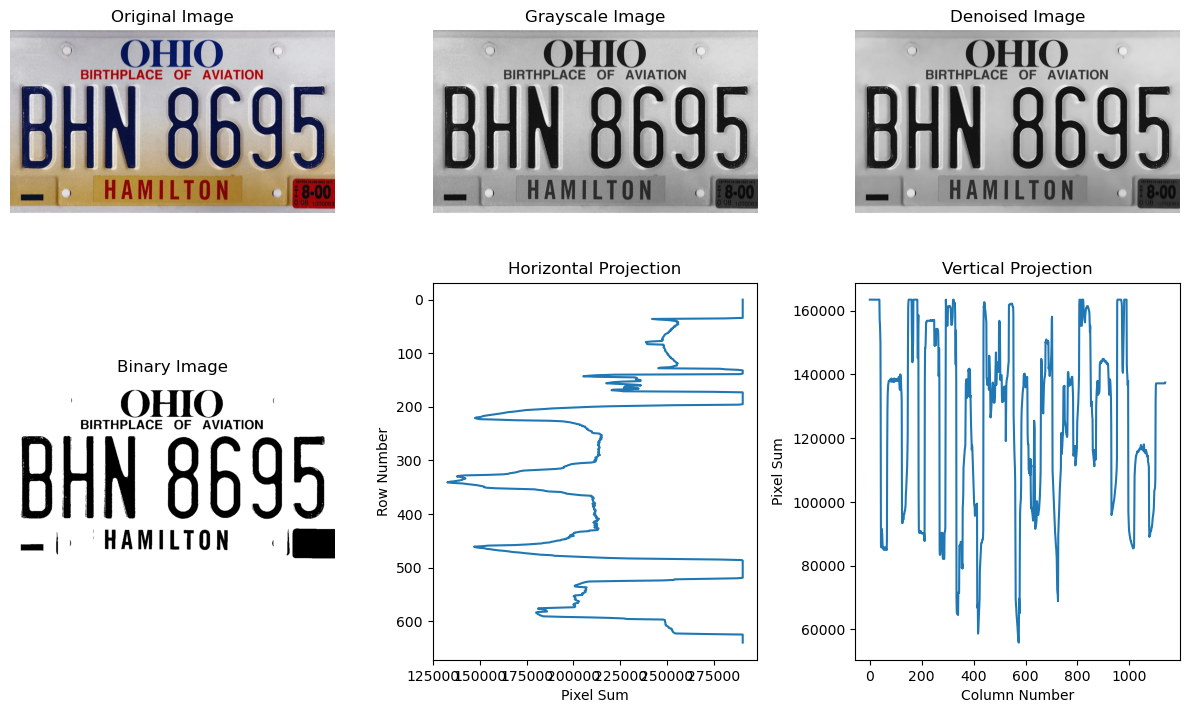

Extracted Text:
 BIRTHPLACE OF AVIATION

—| HAMILTON | jm




In [66]:
import pytesseract as tess                
# Pytesseract is a Python wrapper for Tesseract OCR, which enables text extraction from images.
from PIL import Image                     
# Python Imaging Library (PIL) allows for image file manipulation, supporting various image formats.
import cv2                                
# OpenCV provides tools for image processing, such as denoising, thresholding, and color conversion.
import numpy as np                        
# NumPy supports efficient array operations, useful for pixel-level manipulations in image processing.
import matplotlib.pyplot as plt           
# Matplotlib enables visualization, displaying images and processed steps within a single figure.


image_path = "/Users/ritikkourav/Downloads/Modifications/6486d654-de70-41d6-a994-7e6b383445ae-1280px-2000_Ohio_License_Plate.webp"
image = cv2.imread(image_path)            

plt.figure(figsize=(12, 8))               
# Set the figure size for displaying multiple images in a single row.

# Display the original image
plt.subplot(2, 3, 1)                      
# Create a subplot in position 1 out of 6 total positions.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
# Convert the image color from BGR (OpenCV default) to RGB for Matplotlib compatibility and display it.
plt.title("Original Image")      
plt.axis("off")                        


# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
# Convert the image to grayscale to simplify text detection, as OCR works better on single-channel images.
plt.subplot(2, 3, 2)                      
# Create a subplot in position 2 out of 6.
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")            
plt.axis("off")    


# Apply denoising to the grayscale image
denoised_image = cv2.fastNlMeansDenoising(gray_image, h=8, templateWindowSize=10, searchWindowSize=15)
# Apply non-local means denoising to the grayscale image to reduce noise.
# `h=8`: Controls the noise reduction strength. Higher values remove more noise but can affect details.
# `templateWindowSize=30`: Defines the patch size around each pixel to analyze for similar patterns.
# `searchWindowSize=20`: Sets the area around the patch to search for similar patterns, aiding in better noise reduction.
plt.subplot(2, 3, 3)                      
# Create a subplot in position 3 out of 6.
plt.imshow(denoised_image, cmap='gray')   
# Display the denoised grayscale image with a grayscale color map.
plt.title("Denoised Image")               
plt.axis("off")                        


# Apply binary thresholding
_, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
# Convert the denoised image to a binary (black-and-white) image using Otsu's thresholding method:
# Otsu's method automatically calculates the optimal threshold to separate text from the background.
# Pixels with values above the threshold are set to 255 (white), and those below are set to 0 (black),
# creating a clear distinction between text (white on black) and background, enhancing OCR accuracy.
plt.subplot(2, 3, 4)                      
plt.imshow(binary_image, cmap='gray')    
# Display the binary image with a grayscale color map for better visualization.
plt.title("Binary Image")                 
plt.axis("off")                           


# Calculate horizontal and vertical projections
horizontal_projection = np.sum(binary_image, axis=1)
vertical_projection = np.sum(binary_image, axis=0)

# Plot the horizontal projection
plt.subplot(2, 3, 5)
plt.plot(horizontal_projection, range(binary_image.shape[0]))
plt.gca().invert_yaxis()
plt.title("Horizontal Projection")
plt.xlabel("Pixel Sum")
plt.ylabel("Row Number")

# Plot the vertical projection
plt.subplot(2, 3, 6)
plt.plot(range(binary_image.shape[1]), vertical_projection)
plt.title("Vertical Projection")
plt.xlabel("Column Number")
plt.ylabel("Pixel Sum")

plt.tight_layout()                        
# Adjust the layout to prevent overlapping images and titles.
plt.show()                                


# Perform OCR on the binary image
text = tess.image_to_string(binary_image) 
# Use pytesseract to perform OCR on the binary image to extract text.

# Print the extracted text
print("Extracted Text:\n", text) 
